# Gradient Boost To Predict Temperature Given Humidity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
weather_df = pd.read_csv('weatherHistory.csv')
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## EDA

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
weather_df.shape

(96453, 12)

In [5]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


check for any missing and duplicate values

In [6]:
weather_df.duplicated().sum()

24

In [7]:
# drop duplicated values
weather_df.drop_duplicates(inplace=True)

In [8]:
weather_df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
# drop all null values
weather_df.dropna(inplace=True)

The dataset contained null and duplicated values. Since the null values represent a very minute portion of the overall dataset, dropping the affected rows was a viable option. We also drop any duplicate rows in the dataset.

## Data manipulation

We can drop the <b>Formatted Date</b> column as we will not be using it for modelling

In [10]:
weather_df.drop('Formatted Date', axis=1, inplace=True)

<p style='padding-top: 20px'> Looking at the columns <b>Summary</b>, <b>Precip Type</b>, and <b>Daily Summary</b> the data is categorical. We can convert these columns into categorical type and encode them to numerical values that can be used for modelling </p>

In [11]:
columns = ['Summary', 'Precip Type', 'Daily Summary']

for column in columns:
    weather_df[column] = weather_df[column].astype('category')

In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95912 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Summary                   95912 non-null  category
 1   Precip Type               95912 non-null  category
 2   Temperature (C)           95912 non-null  float64 
 3   Apparent Temperature (C)  95912 non-null  float64 
 4   Humidity                  95912 non-null  float64 
 5   Wind Speed (km/h)         95912 non-null  float64 
 6   Wind Bearing (degrees)    95912 non-null  float64 
 7   Visibility (km)           95912 non-null  float64 
 8   Loud Cover                95912 non-null  float64 
 9   Pressure (millibars)      95912 non-null  float64 
 10  Daily Summary             95912 non-null  category
dtypes: category(3), float64(8)
memory usage: 7.0 MB


In [13]:
for column in columns:
    weather_df[column] = weather_df[column].cat.codes

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder()
encoder.fit_transform(weather_df[columns]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### check for correlaation

In [16]:
corr = weather_df.corr()

<Axes: >

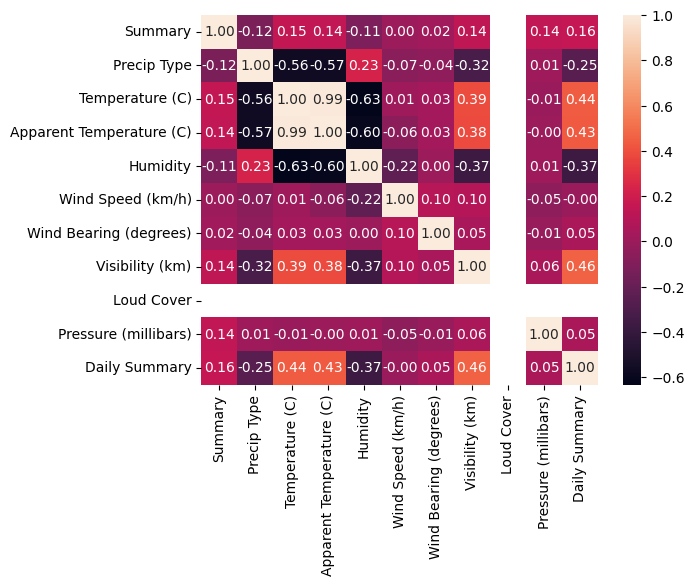

In [17]:
sns.heatmap(corr, annot=True, fmt='.2f')

#### check for outliers in the data

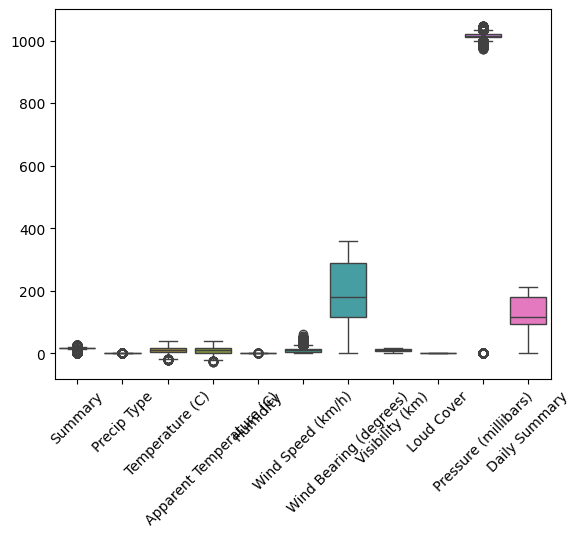

In [18]:
sns.boxplot(data=weather_df)
plt.xticks(rotation=45)
plt.show()

The dataset has no significant outliers but we will still use the winsorize technique to mitigate any outliers

In [19]:
from scipy.stats.mstats import winsorize

In [20]:
for column in weather_df.columns:
    weather_df[column] = winsorize(weather_df[column],limits=[0.15,0.15])

#### Modelling

In [21]:
# X independent variables
X = weather_df.drop(['Temperature (C)','Apparent Temperature (C)'], axis=1)

In [22]:
# y dependant / target variable
y = weather_df['Temperature (C)']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.85080631,  0.        , -1.53601567, ...,  0.        ,
         0.40991207, -1.45329836],
       [ 0.07255378,  0.        , -0.03857782, ...,  0.        ,
        -0.0779705 , -0.39042325],
       [-1.87307754,  0.        , -1.41122919, ...,  0.        ,
        -0.52376124, -0.94154368],
       ...,
       [ 0.85080631,  0.        , -0.66251026, ...,  0.        ,
        -0.57350613,  0.75118334],
       [-1.87307754,  0.        , -1.59840892, ...,  0.        ,
         1.46794759,  1.30230376],
       [ 0.46168004,  0.        ,  0.71014111, ...,  0.        ,
         0.23963148, -0.39042325]])

<Axes: >

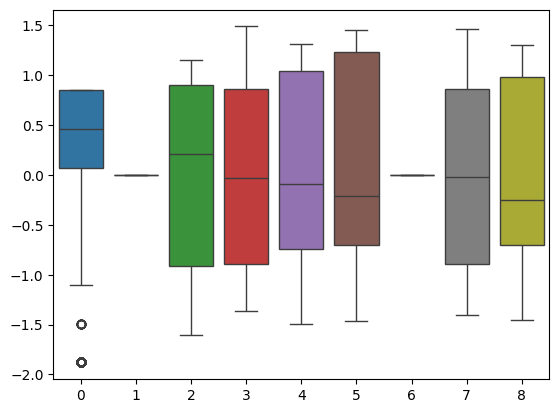

In [27]:
sns.boxplot(data=X_train)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
gbr = GradientBoostingRegressor(n_estimators=500,random_state=42)

In [30]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500, random_state=42)

In [31]:
y_predict = gbr.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
Accuracy = gbr.score(X_test, y_test)
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

print( {
'Accuracy': Accuracy,
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE,
})

{'Accuracy': 0.6514534070067056, 'MAE': 3.4500037342112035, 'MSE': 20.15004527878236, 'RMSE': 4.488880180934033}
